# **Project 1 Bootstrap**
---

In [1]:
import numpy as np                                  # Using python to accomadate order of operations and numerical functions
import pandas as pd                                 # For reading files and depicting imported data
import random                                       # Using python tools to generate random integers and outcomes
import time                                         # Allow time to be used as a place holder in graphs and measure the progression of program executions over time
import sys                                          # Add the ability to import tools and files inside the container's directories
sys.path.insert(0, '/home')                         # Import the home directory into python's file path so the files and programs therein are reachable

from tqdm import tqdm                               # Import tool meant to track the progress of executing a program
import matplotlib.pyplot as plt                     # Allow visualization of graphical interfaces
from rrccml.Neural_Net import network as net        # Import the pre-made code to create neural nets into this notebook
from rrccml.Neural_Net import layer as lyr          # Allow the creation and organization of layer components of which data will be fed through the neural net
from rrccml.Neural_Net import activation as act_fun # Make the function to execute the neural net usable on this notebook

In [2]:
RawDataLiver = pd.read_csv("~/Files/Data/Liver/indian_liver_patient.csv") # Import the entire dataset as a whole with no edits

In [3]:
RawDataLiver.keys() # Depict all the different labels different data points fall under

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [4]:
RawDataLiver = RawDataLiver.dropna() # Eliminate all non-numerical data points and null values
RawDataLiver                         # Depict the full set of data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
np.unique(RawDataLiver["Dataset"], return_counts=True) # Convert the dataset into an array and point out what unique data points are in the assigned column of "Datasets"

(array([1, 2]), array([414, 165]))

- 1 = sick
- 2 = healthy 

- Drop the age element entirely, include only healthcare variables; total of 8 variables to keep in the dataset

In [6]:
np.shape(RawDataLiver) # 579 rows and 11 columns in the liver data as a whole

(579, 11)

In [7]:
np.unique(RawDataLiver["Age"], return_counts=True) # Remove all copied integers in the column and add them to a new array that will be displayed alongside the original

(array([ 4,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
        23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
        40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75,
        78, 84, 85, 90]),
 array([ 2,  1,  2,  1,  1,  1,  2,  4,  2,  1,  3,  5, 11,  2,  3,  7,  9,
         3,  5,  5, 14,  5,  8,  7, 10,  8, 20, 15,  8, 11, 11,  9, 21,  6,
        17,  5, 21,  4,  3, 24, 16,  6, 20, 11, 23,  9,  7,  6,  8, 18,  4,
         7, 14, 34,  5,  9,  2,  6, 17, 12,  1,  4,  2,  9,  8,  2,  4, 14,
         1,  1,  1,  1]))

In [8]:
SickLiver = RawDataLiver.loc[RawDataLiver['Dataset'] == 1] # Arrange all data points labeled with the Dataset point of '1'
SickLiver.iloc()                                           # Seperate the date points from the overall set to create a sample
SickLiver                                                  # Display the sample

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1


In [9]:
HealthyLiver = RawDataLiver.loc[RawDataLiver['Dataset'] == 2] # Arrange all data points labeled with the dataset point of '2' 
HealthyLiver.iloc()                                           # Seperate the data points from the overall set to create a new sample
HealthyLiver                                                  # Display the sample

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
12,64,Male,0.9,0.3,310,61,58,7.0,3.4,0.90,2
15,25,Male,0.6,0.1,183,91,53,5.5,2.3,0.70,2
17,33,Male,1.6,0.5,165,15,23,7.3,3.5,0.92,2
24,63,Male,0.9,0.2,194,52,45,6.0,3.9,1.85,2
...,...,...,...,...,...,...,...,...,...,...,...
551,29,Male,1.2,0.4,160,20,22,6.2,3.0,0.90,2
564,38,Female,0.6,0.1,165,22,34,5.9,2.9,0.90,2
566,50,Female,1.0,0.3,191,22,31,7.8,4.0,1.00,2
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2


In [10]:
SickLiver.iloc[75: ]   # Extract data points starting from position 75 and downward of the SickLiver set and display the final result
HealthyLiver.loc[25: ] # Extract data points starting from position 25 and downward of the HealthLiver set and display the final result

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
28,20,Male,1.1,0.5,128,20,30,3.9,1.9,0.95,2
29,84,Female,0.7,0.2,188,13,21,6.0,3.2,1.10,2
32,57,Male,1.0,0.3,187,19,23,5.2,2.9,1.20,2
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
...,...,...,...,...,...,...,...,...,...,...,...
551,29,Male,1.2,0.4,160,20,22,6.2,3.0,0.90,2
564,38,Female,0.6,0.1,165,22,34,5.9,2.9,0.90,2
566,50,Female,1.0,0.3,191,22,31,7.8,4.0,1.00,2
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2


In [11]:
Features = RawDataLiver[[ 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']] # List all desired data categories to be listed

Target = RawDataLiver[["Dataset"]]    # Arrange the data points to abide by the previously stated dataset definitions: 1=sick, 2=healthy

In [12]:
Features                              # Display the listed features in accordance with how they reach the target

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,7.3,4.1,490,60,68,7.0,3.3,0.89
3,1.0,0.4,182,14,20,6.8,3.4,1.00
4,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...
578,0.5,0.1,500,20,34,5.9,1.6,0.37
579,0.6,0.1,98,35,31,6.0,3.2,1.10
580,0.8,0.2,245,48,49,6.4,3.2,1.00
581,1.3,0.5,184,29,32,6.8,3.4,1.00


In [13]:
Target # List which data points belong to which target without the other categories

,Dataset
0,1
1,1
2,1
3,1
4,1
...,...
578,2
579,1
580,1
581,1


In [14]:
X_Train = Features.iloc[:int(len(Features) * .9)] # Extracting 90% of all listed data points from the 'Features' columns to be sent through a neural net
Y_Train = Target.iloc[:int(len(Features) * .9)]   # Extracting 90 % of all listed data points from the 'Features' rows to be sent through a neural net 

# Data within 'Test' will NOT be included in the training process
X_Test = Features.iloc[:int(len(Features) * .9) : ] # Extracting 90% of all listed data points from the 'Features' columns to evaluate the performance of the neural net following the training phase
Y_Test =  Target.iloc[:int(len(Features) * .9) : ]  # Extracting 90% of all listed datapoints from the 'Features' rows to evaluate the performance of the neural net following the training phase

In [15]:
def error_func(actual, expected): 
    return (actual - expected)

In [16]:
liver_net = net.Network(X_Train, Y_Train)

In [17]:
# Hidden Layer 1
liver_net.add_layer(lyr.Connected(500, "sigmoid"))

# Hidden Layer 2
liver_net.add_layer(lyr.Connected(100, "relu"))

#Hidden Layer 3
liver_net.add_layer(lyr.Connected(30, "relu"))

# Output Layer
liver_net.add_layer(lyr.Connected(1, "sigmoid"))

In [18]:
liver_net.compile()

epochs = 200

for i in tqdm(range(epochs)):
    # NOTE x_val, y_val, and eval_function are all just place holders for now AND DO NOTHING
    liver_net.train(x_val=1, y_val=1, epochs=200, cost_function=error_func, eval_function=None, learning_rate=.01)
    #print("This print is here because the train function returns a diagnostic and I don't want it to print here.")

  0%|          | 0/200 [00:00<?, ?it/s]/home/rrccml/Neural_Net/activation.py:23: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.e ** (-z))
100%|██████████| 200/200 [1:21:05<00:00, 24.33s/it]


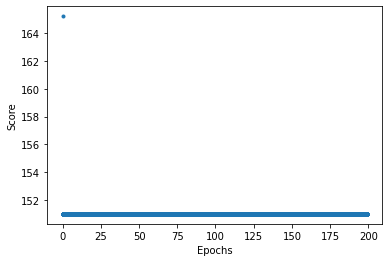

In [19]:
history = np.array(liver_net.history)

plt.scatter(history[:, 0], history[:, 1], marker='.')
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.show()

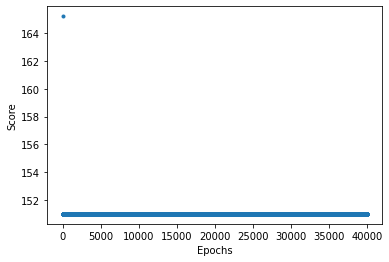

In [20]:
# COPIED FROM ADAMS LECTURE TODAY
history = np.array(liver_net.history)
t = np.arange(len(history))

plt.scatter(t, history[:, 1], marker='.')
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.show()

In [21]:
W1, W2, W3, W4 = liver_net.get_weights()

In [22]:
error = 0
for x,y in zip(np.array(X_Test), np.array(Y_Test)):
    prediction = liver_net.forward_pass(x)
    error += np.round(np.abs(prediction -  y))
    
print(f"Got {error} wrong out of {len(Y_Test)}")
print(100 * (len(Y_Test) - error)/len(Y_Test),"%")

Got [151.] wrong out of 521
[71.01727447] %


---
## **Bootstrapping Process**
---

In [ ]:
BootStrapData = RawDataLiver.sample(frac=1)

In [ ]:
BootStrapData

In [ ]:
delim = "$"
res = []

for i in range BootStrapData:
    value = i.split(delim)
    res.append(value[1])
    res.append(value[2])
    

In [ ]:
sickLiver = RawDataLiver.loc[RawDataLiver["Datasets"] == 1]
sickLiver.iloc
sickLiver